**#Load Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/python_test_dataset_flights_6months.csv')

# Display the first few rows
data.head()

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,2024-03-01,PayPal,Yes,369.648995,Web,confirmed,04-03-2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,2024-03-01,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,2024-03-01,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,2024-03-01,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,2024-03-01,Debit Card,Yes,727.341978,Web,confirmed,11-09-2023,0.000000,0.000000,No


**#Convert Dates and Explore Data**

In [ ]:
# Convert date columns to datetime format
data['booking_date'] = pd.to_datetime(data['booking_date'])
data['travel_date'] = pd.to_datetime(data['travel_date'], format='%d-%m-%Y')

# Check for missing values
data.isnull().sum()

# Display dataset summary
data.describe()


,buyer_id,supplier_id,pax,costprice,markup,selling_price,booking_date,refund_amount,travel_date,cashback,coupon_redeem
count,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240,32240.000000,32240,32240.000000,32240.000000
mean,249.198728,4.132351,2.995440,534.454208,214.911897,749.185111,2024-05-27 19:59:07.295284992,321.169098,2024-01-07 08:15:28.138957568,1.800790,7.230413
min,1.000000,1.000000,1.000000,50.005653,-51.478750,50.766206,2024-03-01 00:00:00,0.000000,2023-01-01 00:00:00,0.000000,-5.147875
25%,123.000000,2.000000,2.000000,292.391617,78.381381,399.945463,2024-04-11 00:00:00,0.000000,2023-07-20 00:00:00,0.000000,0.000000
50%,248.000000,4.000000,3.000000,533.950333,171.356857,729.318731,2024-05-26 00:00:00,221.482908,2024-01-05 00:00:00,0.000000,0.000000
75%,374.000000,6.000000,4.000000,773.706987,305.323878,1062.007949,2024-07-13 00:00:00,593.005610,2024-07-18 00:00:00,0.000000,8.969851
max,499.000000,7.000000,5.000000,1150.283064,1197.747825,2126.801346,2024-08-31 00:00:00,1462.725105,2024-12-31 00:00:00,21.268013,91.593305
std,144.847428,1.987509,1.414173,280.406808,176.536047,414.305052,NaN,339.865111,NaN,3.790310,13.746741


**#Sales Trend Over Time**

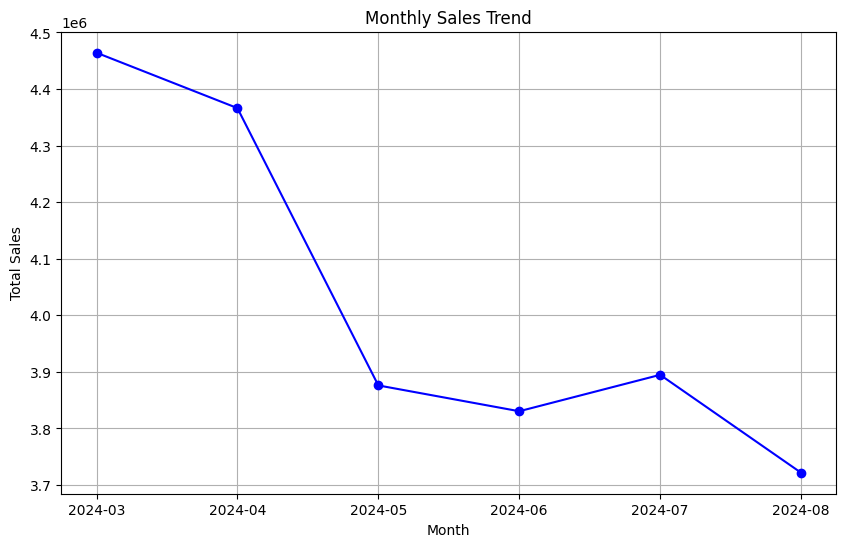

In [ ]:
import matplotlib.pyplot as plt

# Group data by month and sum up the selling price
data['month'] = data['booking_date'].dt.to_period('M')
monthly_sales = data.groupby('month')['selling_price'].sum()

# Convert PeriodIndex to string (or use to_timestamp() for datetime)
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index.astype(str), monthly_sales, marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)

# Show plot
plt.show()

**#Refund Analysis**

Refund Rate: 69.57%


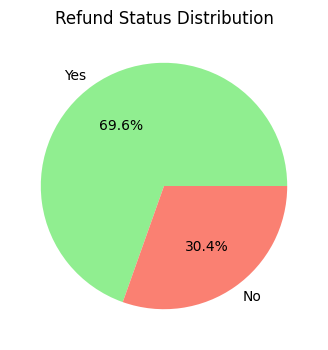

In [ ]:
# Calculate refund rate
refund_rate = data['refund_status'].value_counts(normalize=True)['Yes'] * 100
print(f'Refund Rate: {refund_rate:.2f}%')

# Plot refund status distribution
plt.figure(figsize=(6,4))
data['refund_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Refund Status Distribution')
plt.ylabel('')
plt.show()


**#Pricing vs. Markup Analysis**

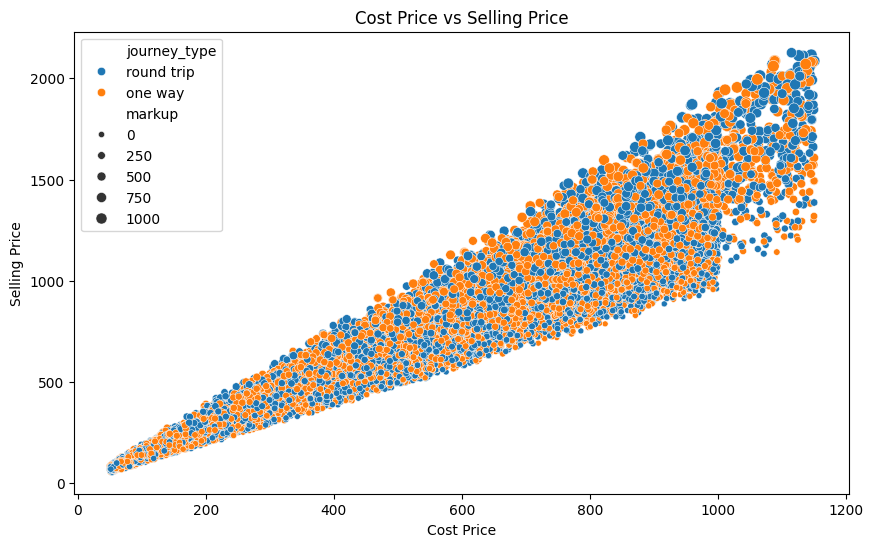

In [ ]:
import seaborn as sns

# Plot cost price vs selling price and markup
plt.figure(figsize=(10,6))
sns.scatterplot(x='costprice', y='selling_price', size='markup', hue='journey_type', data=data)
plt.title('Cost Price vs Selling Price')
plt.xlabel('Cost Price')
plt.ylabel('Selling Price')
plt.show()


**#Channel-Specific Performance Analysis**

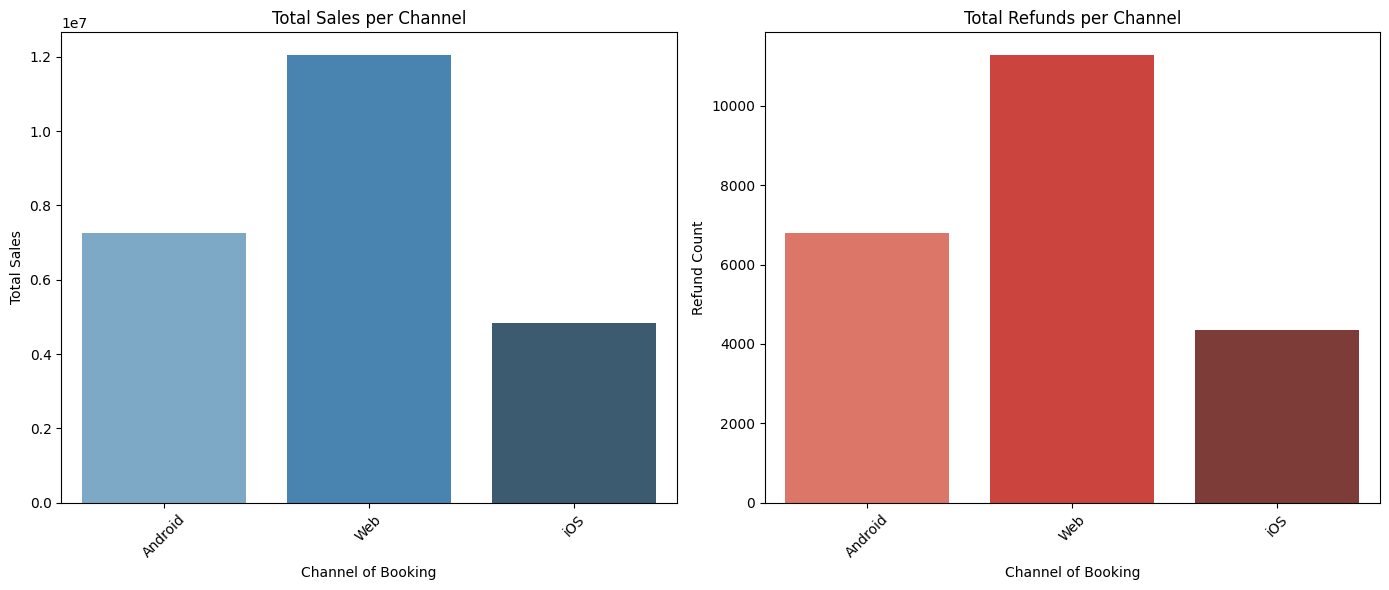

In [ ]:
# Total sales per channel
sales_per_channel = data.groupby('channel_of_booking')['selling_price'].sum()

# Refund rates per channel
refunds_per_channel = data[data['refund_status'] == 'Yes'].groupby('channel_of_booking')['selling_price'].count()

# Plot Sales and Refund Rates per Channel
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Sales per Channel
sns.barplot(x=sales_per_channel.index, y=sales_per_channel.values, ax=ax[0],  hue=sales_per_channel.index, palette="Blues_d", legend=False)
ax[0].set_title('Total Sales per Channel')
ax[0].set_xlabel('Channel of Booking')
ax[0].set_ylabel('Total Sales')
ax[0].tick_params(axis='x', rotation=45)

# Refund Rate per Channel
sns.barplot(x=refunds_per_channel.index, y=refunds_per_channel.values, ax=ax[1], hue=refunds_per_channel.index, palette="Reds_d", legend=False)
ax[1].set_title('Total Refunds per Channel')
ax[1].set_xlabel('Channel of Booking')
ax[1].set_ylabel('Refund Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**#Time-Based Analysis: Booking Lead Time**

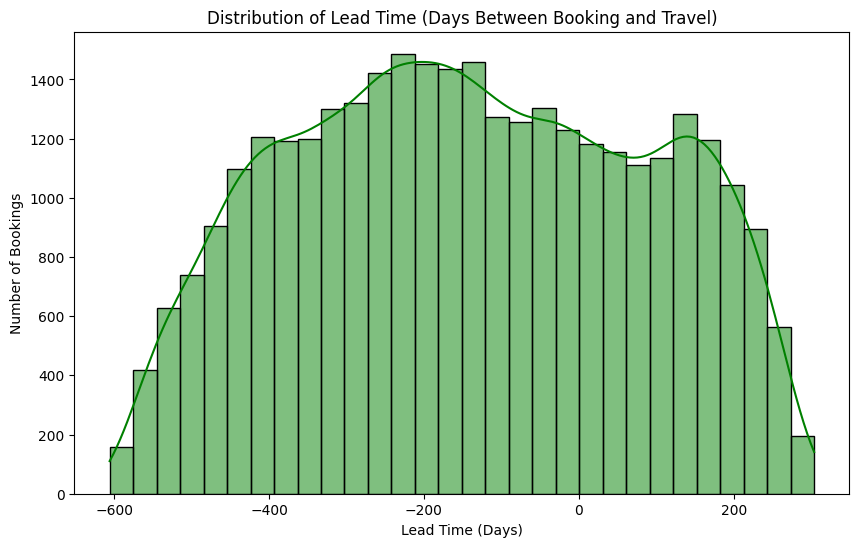

In [ ]:
# Calculate lead time (difference between travel date and booking date)
data['lead_time'] = (data['travel_date'] - data['booking_date']).dt.days

# Plot distribution of lead time
plt.figure(figsize=(10,6))
sns.histplot(data['lead_time'], bins=30, kde=True, color='green')
plt.title('Distribution of Lead Time (Days Between Booking and Travel)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.show()


**#Customer Segmentation Based on Booking Value**

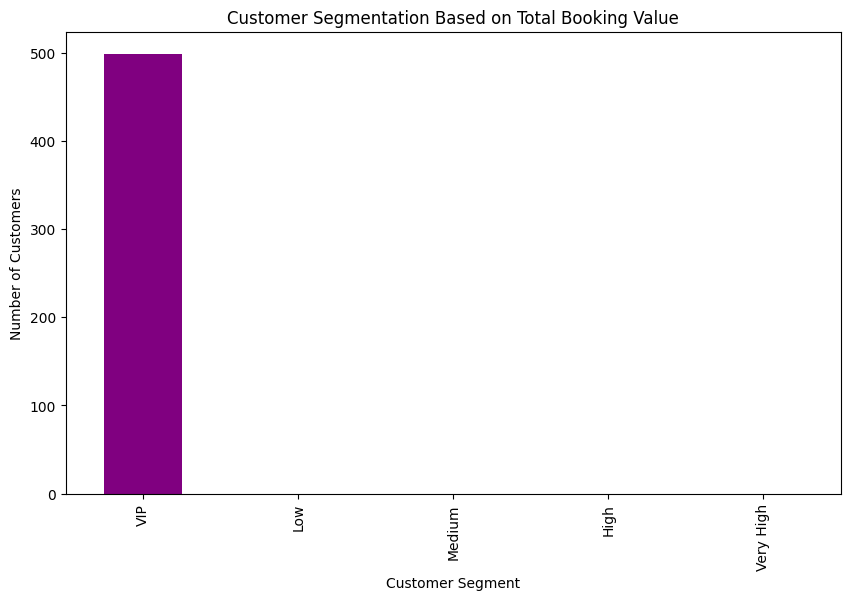

In [ ]:
# Group customers by total booking value
customer_value = data.groupby('buyer_id')['selling_price'].sum()

# Define customer segments based on total booking value
bins = [0, 500, 2000, 5000, 10000, customer_value.max()]
labels = ['Low', 'Medium', 'High', 'Very High', 'VIP']
customer_segments = pd.cut(customer_value, bins=bins, labels=labels)

# Plot the distribution of customer segments
plt.figure(figsize=(10,6))
customer_segments.value_counts().plot(kind='bar', color='purple')
plt.title('Customer Segmentation Based on Total Booking Value')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


**#Pricing Analysis: Relationship Between Markup and Sales**

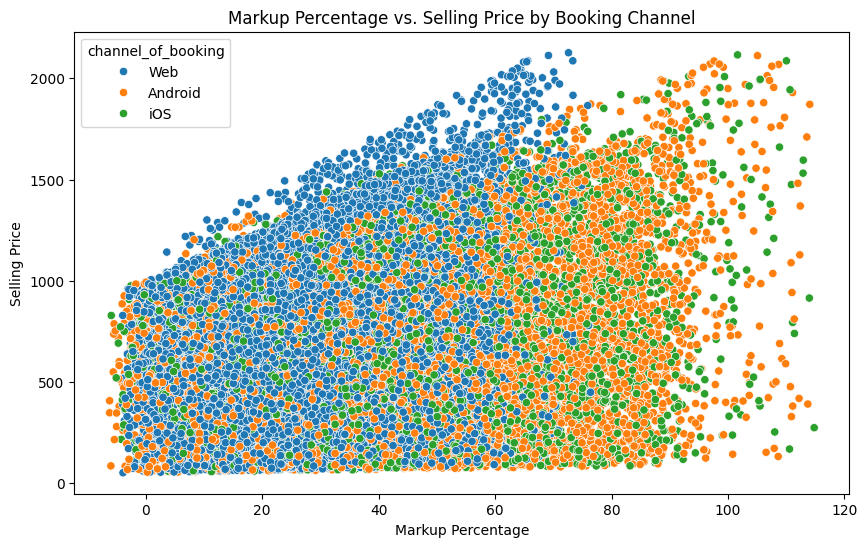

In [ ]:
# Calculate markup percentage
data['markup_percentage'] = (data['markup'] / data['costprice']) * 100

# Plot markup percentage vs. selling price
plt.figure(figsize=(10,6))
sns.scatterplot(x='markup_percentage', y='selling_price', hue='channel_of_booking', data=data)
plt.title('Markup Percentage vs. Selling Price by Booking Channel')
plt.xlabel('Markup Percentage')
plt.ylabel('Selling Price')
plt.show()


**#Day of Week Impact on Sales**

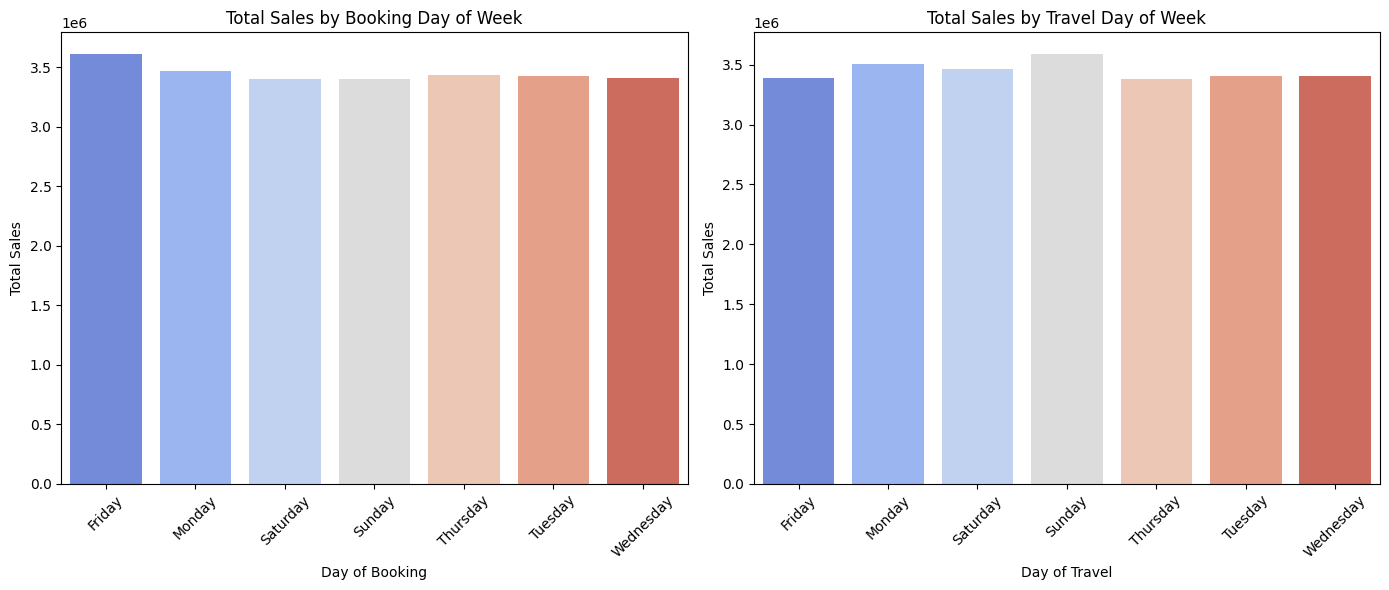

In [ ]:
# Extract day of the week for booking and travel dates
data['booking_day'] = data['booking_date'].dt.day_name()
data['travel_day'] = data['travel_date'].dt.day_name()

# Sales by booking day of the week
sales_by_booking_day = data.groupby('booking_day')['selling_price'].sum()

# Sales by travel day of the week
sales_by_travel_day = data.groupby('travel_day')['selling_price'].sum()

# Plot sales by booking and travel days
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Sales by Booking Day
sns.barplot(x=sales_by_booking_day.index, y=sales_by_booking_day.values, ax=ax[0],hue=sales_by_booking_day.index, palette="coolwarm", legend=False)
ax[0].set_title('Total Sales by Booking Day of Week')
ax[0].set_xlabel('Day of Booking')
ax[0].set_ylabel('Total Sales')
ax[0].tick_params(axis='x', rotation=45)

# Sales by Travel Day
sns.barplot(x=sales_by_travel_day.index, y=sales_by_travel_day.values, ax=ax[1],hue=sales_by_travel_day.index, palette="coolwarm", legend=False)
ax[1].set_title('Total Sales by Travel Day of Week')
ax[1].set_xlabel('Day of Travel')
ax[1].set_ylabel('Total Sales')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**#Refund Rate by Booking Value**

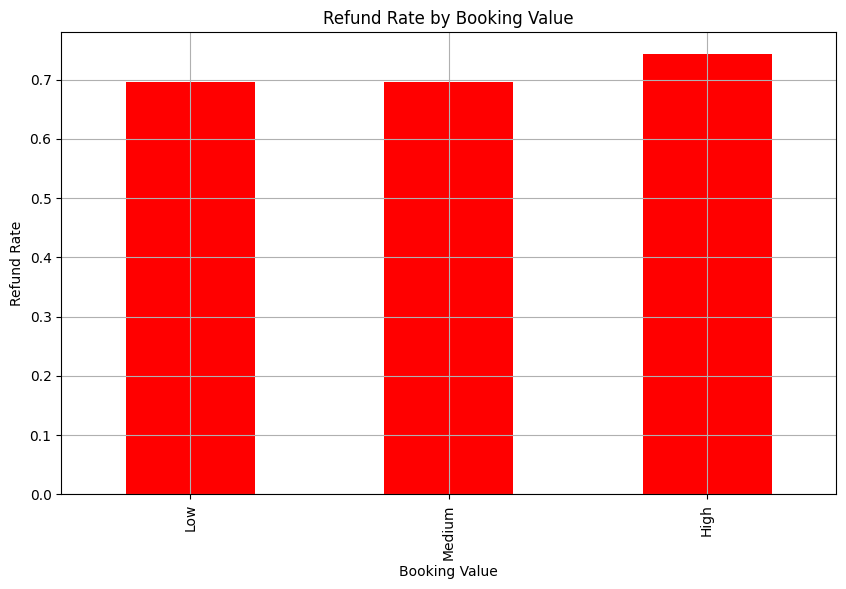

In [ ]:
# Get the maximum selling price
max_value = data['selling_price'].max()

# Dynamically adjust bins based on the maximum value in selling_price
bins = [0, 500, 2000, 5000, 10000]

# Remove bin edges that are larger than max_value
bins = [b for b in bins if b < max_value]
bins.append(max_value + 1)  # Add one more bin to cover the max_value

# Bucket data by selling price using the dynamically adjusted bins
data['price_bucket'] = pd.cut(data['selling_price'],
                              bins=bins,
                              labels=['Low', 'Medium', 'High', 'Very High', 'VIP'][:len(bins)-1])

# Calculate refund counts and total counts per price bucket
refund_count_by_bucket = data[data['refund_status'] == 'Yes'].groupby('price_bucket', observed=True)['refund_status'].count()
total_count_by_bucket = data.groupby('price_bucket', observed=True)['refund_status'].count()

# Calculate refund rate and handle NaN values
refund_rate_by_value = (refund_count_by_bucket / total_count_by_bucket).fillna(0)

# Plot refund rate by booking value
plt.figure(figsize=(10,6))
refund_rate_by_value.plot(kind='bar', color='red')
plt.title('Refund Rate by Booking Value')
plt.xlabel('Booking Value')
plt.ylabel('Refund Rate')
plt.grid(True)
plt.show()
